## A comparison between the different sentiment analysis approaches

- Textblob https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis
    - The polarity score is a float within the range [-1.0, 1.0]. 
    - The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective

- Vader https://vadersentiment.readthedocs.io/en/latest/pages/about_the_scoring.html
    - compound score is -1 (most extreme negative) and +1 (most extreme positive)

- Loughran and McDonald  https://nickderobertis.github.io/pysentiment/ ; https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9142175
    - Polarity and Subjectivity are calculated in the same way of Lydia system:
    - Each of the words in the sentences is categorized into either a positive or a negative group based on its sentiment in the lexicon (Eq. 1). If polarity>0, then the sentence is classified as positive, and if polarity<0, then the sentence is classified as negative.

    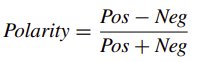


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import sklearn
import statsmodels.api as sm

In [2]:
CURR_DIR = os.getcwd()
DATA_DIR = os.path.join(CURR_DIR, 'Datasets')

In [3]:
# Import data
filenames = ['btc_all_sentiment.csv', 'eth_all_sentiment.csv', 'xrp_all_sentiment.csv','ada_all_sentiment.csv','bnb_all_sentiment.csv']
dfs ={}
for filename in filenames:
    filepath = os.path.join(DATA_DIR, filename)
    dfs[filename] = pd.read_csv(filepath)

In [4]:
# Function for grouped df
# def get_textBlob_sentiment(score):
#     if score > 0:
#         return 'positive'
#     elif score == 0:
#         return 'neutral'
#     else:
#         return 'negative'

# def get_vader_sentiment(score):
#     if score >= 0.5:
#         return 'positive'
#     elif score <= -0.5:
#         return 'negative'
#     elif score > -0.5 and score < 0.5:
#         return 'neutral'

def get_finbert_text_sentiment(df):
    scores = df[['finBert_text_positive_score', 'finBert_text_negative_score', 'finBert_text_neutral_score']].values
    sentiment = ['positive', 'negative', 'neutral']
    return sentiment[np.argmax(scores)]

def get_finbert_title_sentiment(df):
    scores = df[['finBert_title_positive_score', 'finBert_title_negative_score', 'finBert_title_neutral_score']].values
    sentiment = ['positive', 'negative', 'neutral']
    return sentiment[np.argmax(scores)]

In [5]:
def plot_all_sentiments_subplots(data, coin_name):
    fig, axes = plt.subplots(14, figsize=(25,25))
    sns.set_style("whitegrid")
    sns.despine(left=True)
    # textBlob_polarity
    sns.lineplot(x=data.index, y='textBlob_polarity', data=data, ax=axes[0])
    axes[0].set_title('TextBlob aggregated average polarity score')
    
    # Loughran and McDonald polarity'
    sns.lineplot(x=data.index, y='lm_polarity', data=data, ax=axes[1])
    axes[1].set_title('Loughran and McDonald aggregated average polarity score')
    
    # vader_compound
    sns.lineplot(x=data.index, y='vader_compound', data=data, ax=axes[2])
    axes[2].set_title('Vader aggregated average vader_compound score')    
    
    # textBlob_subjectivity
    sns.lineplot(x=data.index, y='textBlob_subjectivity', data=data, ax=axes[3])
    axes[3].set_title('TextBlob aggregated average subjectivity score') 
    
    # Loughran and McDonald subjectivity
    sns.lineplot(x=data.index, y='lm_subjectivity', data=data, ax=axes[4])
    axes[4].set_title('Loughran and McDonald aggregated average subjectivity score')
    
    # vader_positive_score
    sns.lineplot(x=data.index,  y='vader_positive_score', data=data, ax=axes[5])
    axes[5].set_title('Vader aggregated average  positive score')
    
    # FinBert positive text score
    sns.lineplot(x=data.index, y='finBert_text_positive_score', data=data, ax=axes[6])
    axes[6].set_title('FinBert aggregated average positive text score')
    
    # FinBert positive title score             
    sns.lineplot(x=data.index, y='finBert_title_positive_score', data=data, ax=axes[7])
    axes[7].set_title('FinBert aggregated average positive title score')
    
    # vader_negative_score
    sns.lineplot(x=data.index, y='vader_negative_score', data=data, ax=axes[8])
    axes[8].set_title('Vader aggregated average negative score')
                 
    # FinBert negative text score
    sns.lineplot(x=data.index, y='finBert_text_negative_score', data=data, ax=axes[9])
    axes[9].set_title('FinBert ggregated average negative text score')
   
    # FinBert negative title score             
    sns.lineplot(x=data.index, y='finBert_title_negative_score', data=data, ax=axes[10])
    axes[10].set_title('FinBert aggregated average negative title score') 
        
    # vader_neutral_score
    sns.lineplot(x=data.index, y='vader_neutral_score', data=data, ax=axes[11])
    axes[11].set_title('Vader aggregated average neutral score')
    
    # FinBert neutral text score
    sns.lineplot(x=data.index, y='finBert_text_neutral_score', data=data, ax=axes[12])
    axes[12].set_title('FinBert aggregated average neutral text score ')
                 
    # FinBert negative title score
    sns.lineplot(x=data.index, y='finBert_title_neutral_score', data=data, ax=axes[13])
    axes[13].set_title('FinBert aggregated average neutral title score')

    plt.suptitle(f"Sentiment Analysis of {coin_name} articles over time")
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

In [6]:
def plot_sentiment_ts(data, y1, title1, y2, title2, y3, title3):
    fig, axes = plt.subplots(3, figsize=(20,18))
    sns.set_style("whitegrid")
    sns.despine(left=True)
    sns.lineplot(x=data.index, y=data[y1], data=data, ax=axes[0])
    axes[0].set_title(title1)
    
    sns.lineplot(x=data.index, y=data[y2], data=data, ax=axes[1])
    axes[1].set_title(title2)
    
    sns.lineplot(x=data.index, y=data[y3], data=data, ax=axes[2])
    axes[2].set_title(title3)
    plt.show()

In [7]:
def plot_distribution(data, x1,x1_label, title1, x2,x2_label, title2, x3,x3_label, title3,
                      x4=None, x4_label=None, title4=None,flag=None):
    sns.set_style("white")
    sns.despine(left=True)
    
    if flag == 'positive':
        fig, axes = plt.subplots(1,4, figsize=(12,4), sharey=True)
        sns.histplot(data[data[x1]>0][x1],kde=True, ax=axes[0])
        textBlob_mean, textBlob_median = plot_statistics(data[data[x1]>0][x1])
        
        sns.histplot(data[data[x2]>0][x2],kde=True, ax=axes[1])
        lm_mean, lm_median = plot_statistics(data[data[x2]>0][x2])
        
        sns.histplot(data[x4], kde=True, ax=axes[3])
        finbert_mean, finbert_median = plot_statistics(data[x4])
        axes[3].set_xlabel(x4_label)
        axes[3].set_title(title4)
        axes[3].axvline(finbert_mean, color='red', label='Mean')
        axes[3].axvline(finbert_median, color='green', label='Median')
        axes[3].legend()
        #print('FinBert:\nmean', mean,'median:',median,'\n')
    elif flag == 'negative':
        fig, axes = plt.subplots(1,4, figsize=(12,4), sharey=True)
        sns.histplot(data[data[x1]<0][x1],kde=True, ax=axes[0])
        textBlob_mean, textBlob_median = plot_statistics(data[data[x1]>0][x1])
        
        sns.histplot(data[data[x2]<0][x2],kde=True, ax=axes[1])
        lm_mean, lm_median = plot_statistics(data[data[x2]>0][x2])
        
        sns.histplot(data[x4], kde=True, ax=axes[3])
        finbert_mean, finbert_median = plot_statistics(data[x4])
        axes[3].set_xlabel(x4_label)
        axes[3].set_title(title4)
        axes[3].axvline(finbert_mean, color='red', label='Mean')
        axes[3].axvline(finbert_median, color='green', label='Median')
        axes[3].legend()
    elif flag == 'neutral':
        fig, axes = plt.subplots(1,4, figsize=(12,4), sharey=True)
        sns.histplot(data[data[x1]==0][x1],kde=True, ax=axes[0])
        textBlob_mean, textBlob_median = plot_statistics(data[data[x1]>0][x1])
        
        sns.histplot(data[data[x2]==0][x2],kde=True, ax=axes[1])
        lm_mean, lm_median = plot_statistics(data[data[x2]>0][x2])
        
        sns.histplot(data[x4], kde=True, ax=axes[3])
        finbert_mean, finbert_median = plot_statistics(data[x4])
        axes[3].set_xlabel(x4_label)
        axes[3].set_title(title4)
        axes[3].axvline(finbert_mean, color='red', label='Mean')
        axes[3].axvline(finbert_median, color='green', label='Median')
        axes[3].legend()
        
    elif flag is None:
        fig, axes = plt.subplots(1,3, figsize=(12,4), sharey=True)
        sns.histplot(data[x1],kde=True, ax=axes[0])
        textBlob_mean, textBlob_median = plot_statistics(data[x1])
        sns.histplot(data[x2], kde=True, ax=axes[1])
        lm_mean, lm_median = plot_statistics(data[x2])

    axes[0].set_xlabel(x1_label)
    axes[0].set_title(title1)
    axes[0].axvline(textBlob_mean, color='red', label='Mean')
    axes[0].axvline(textBlob_median, color='green', label='Median')
    axes[0].legend()
    #print('TextBlob:\nmean', mean,'median:',median,'\n')
    

    axes[1].set_xlabel(x2_label)
    axes[1].set_title(title2)
    axes[1].axvline(lm_mean, color='red', label='Mean')
    axes[1].axvline(lm_median, color='green', label='Median')
    axes[1].legend()
    #print('Loughran and McDonald:\nmean:', mean,'median:',median,'\n')
    
    sns.histplot(data[x3], kde=True, ax=axes[2])
    axes[2].set_xlabel(x3_label)
    axes[2].set_title(title3)
    mean, median = plot_statistics(data[x3])
    axes[2].axvline(mean, color='red', label='Mean')
    axes[2].axvline(median, color='green', label='Median')
    axes[2].legend()
    #print('Vader:\nmean:', mean,'median:',median,'\n')
    
    plt.suptitle('Distribution Comparison')
    plt.show()

In [8]:
def plot_statistics(data):
    # average but sensitive to outliers
    mean = data.mean()
    # middle value in the dataset
    median = data.median()
    return mean, median

In [9]:
def plt_corr_heatmap(df, columns, title):
    plt.figure(figsize=(10,6))
    sns.set_theme(style="white")
    mask = np.triu(np.ones_like(df[columns].corr(), dtype=bool))
    sns.heatmap(df[columns].corr(),annot=True, mask=mask)
    plt.title(title)
    plt.show()


In [10]:
def plot_jointplot(data, x, y, title, x_label, y_label):
    g = sns.jointplot(x=x, y=y, height=5, data=data)
    g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
    g.figure.suptitle(title)
    g.fig.subplots_adjust(top=0.90)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [11]:
def create_sentiment_df(sentiment, df):
    textblob = df[df.textBlob_sentiment==sentiment]['textBlob_polarity']
    lm = df[df.lm_sentiment==sentiment]['lm_polarity']
    
    vader_sentiment = f'vader_{sentiment}_score'
    finBert_sentiment = f'finBert_text_{sentiment}_score'
    
    finbert_vader = df[['date',vader_sentiment, finBert_sentiment]]
    data= pd.DataFrame({'date':finbert_vader.date,'vader':finbert_vader.iloc[:,1],
                         'finbert':finbert_vader.iloc[:,2],'textblob':textblob,
                         'lm':lm})
    return data

# Overview

In [12]:
btc = dfs['btc_all_sentiment.csv']

In [13]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34183 entries, 0 to 34182
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   coin                          34183 non-null  object 
 1   section                       34183 non-null  object 
 2   title                         34183 non-null  object 
 3   text                          34183 non-null  object 
 4   url                           34183 non-null  object 
 5   source                        34183 non-null  object 
 6   date                          34183 non-null  object 
 7   time                          34183 non-null  object 
 8   language                      34183 non-null  object 
 9   word_count                    34183 non-null  int64  
 10  char_count                    34183 non-null  int64  
 11  average_word_length           34183 non-null  float64
 12  stopword_count                34183 non-null  int64  
 13  s

In [14]:
btc_abt = btc[['date','textBlob_polarity','textBlob_subjectivity','textBlob_sentiment','vader_compound','vader_negative_score','vader_neutral_score','vader_positive_score','vader_sentiment','lm_polarity','lm_subjectivity','lm_sentiment','finBert_text_positive_score','finBert_text_negative_score','finBert_text_neutral_score','finBert_text_sentiment','finBert_title_positive_score','finBert_title_negative_score','finBert_title_neutral_score','finBert_title_sentiment']].copy()

In [15]:
btc_abt['finBert_text_sentiment'] = btc.apply(get_finbert_text_sentiment, axis=1)

In [16]:
btc_abt.describe(include=np.number).T

count      mean       std     min       25%  \
textBlob_polarity             34183.0  0.037354  0.081601 -0.5000 -0.010417   
textBlob_subjectivity         34183.0  0.402309  0.104622  0.0000  0.337494   
vader_compound                34183.0  0.515524  0.706365 -0.9996  0.273200   
vader_negative_score          34183.0  0.080810  0.060477  0.0000  0.035000   
vader_neutral_score           34183.0  0.771232  0.070574  0.3960  0.727000   
vader_positive_score          34183.0  0.147960  0.056748  0.0000  0.110000   
lm_polarity                   34183.0 -0.263659  0.479986 -1.0000 -0.600000   
lm_subjectivity               34183.0  0.071952  0.036346  0.0000  0.046980   
finBert_text_positive_score   34183.0  0.215384  0.269768  0.0060  0.034000   
finBert_text_negative_score   34183.0  0.225265  0.323866  0.0060  0.014000   
finBert_text_neutral_score    34183.0  0.559351  0.343444  0.0090  0.191000   
finBert_title_positive_score  34183.0  0.148221  0.236560  0.0060  0.028000   
finBert_title_negative_score  34183.0  0.186452  0.291438  0.0060  0.019000   
finBert_title_neutral_score   34183.0  0.665325  0.334214  0.0100  0.375500   
finBert_title_sentiment       34183.0  1.606588  0.681968  0.0000  1.000000   

                                   50%       75%       max  
textBlob_polarity             0.035296  0.083780  0.800000  
textBlob_subjectivity         0.404386  0.468523  1.000000  
vader_compound                0.924600  0.983100  0.999900  
vader_negative_score          0.071000  0.114000  0.545000  
vader_neutral_score           0.772000  0.817000  1.000000  
vader_positive_score          0.145000  0.182000  0.459000  
lm_polarity                  -0.333333  0.000000  1.000000  
lm_subjectivity               0.067708  0.091624  0.377049  
finBert_text_positive_score   0.083000  0.268000  0.958000  
finBert_text_negative_score   0.038000  0.327000  0.976000  
finBert_text_neutral_score    0.694000  0.882000  0.958000  
finBert_title_positive_score  0.047000  0.114000  0.957000  
finBert_title_negative_score  0.036000  0.178000  0.975000  
finBert_title_neutral_score   0.862000  0.925000  0.959000  
finBert_title_sentiment       2.000000  2.000000  2.000000

In [17]:
btc_abt.describe(exclude=np.number).T

count unique         top   freq
date                    34183   3467  2021-10-20     54
textBlob_sentiment      34183      3    positive  23743
vader_sentiment         34183      3    positive  24605
lm_sentiment            34183      3    negative  24025
finBert_text_sentiment  34183      3     neutral  20761

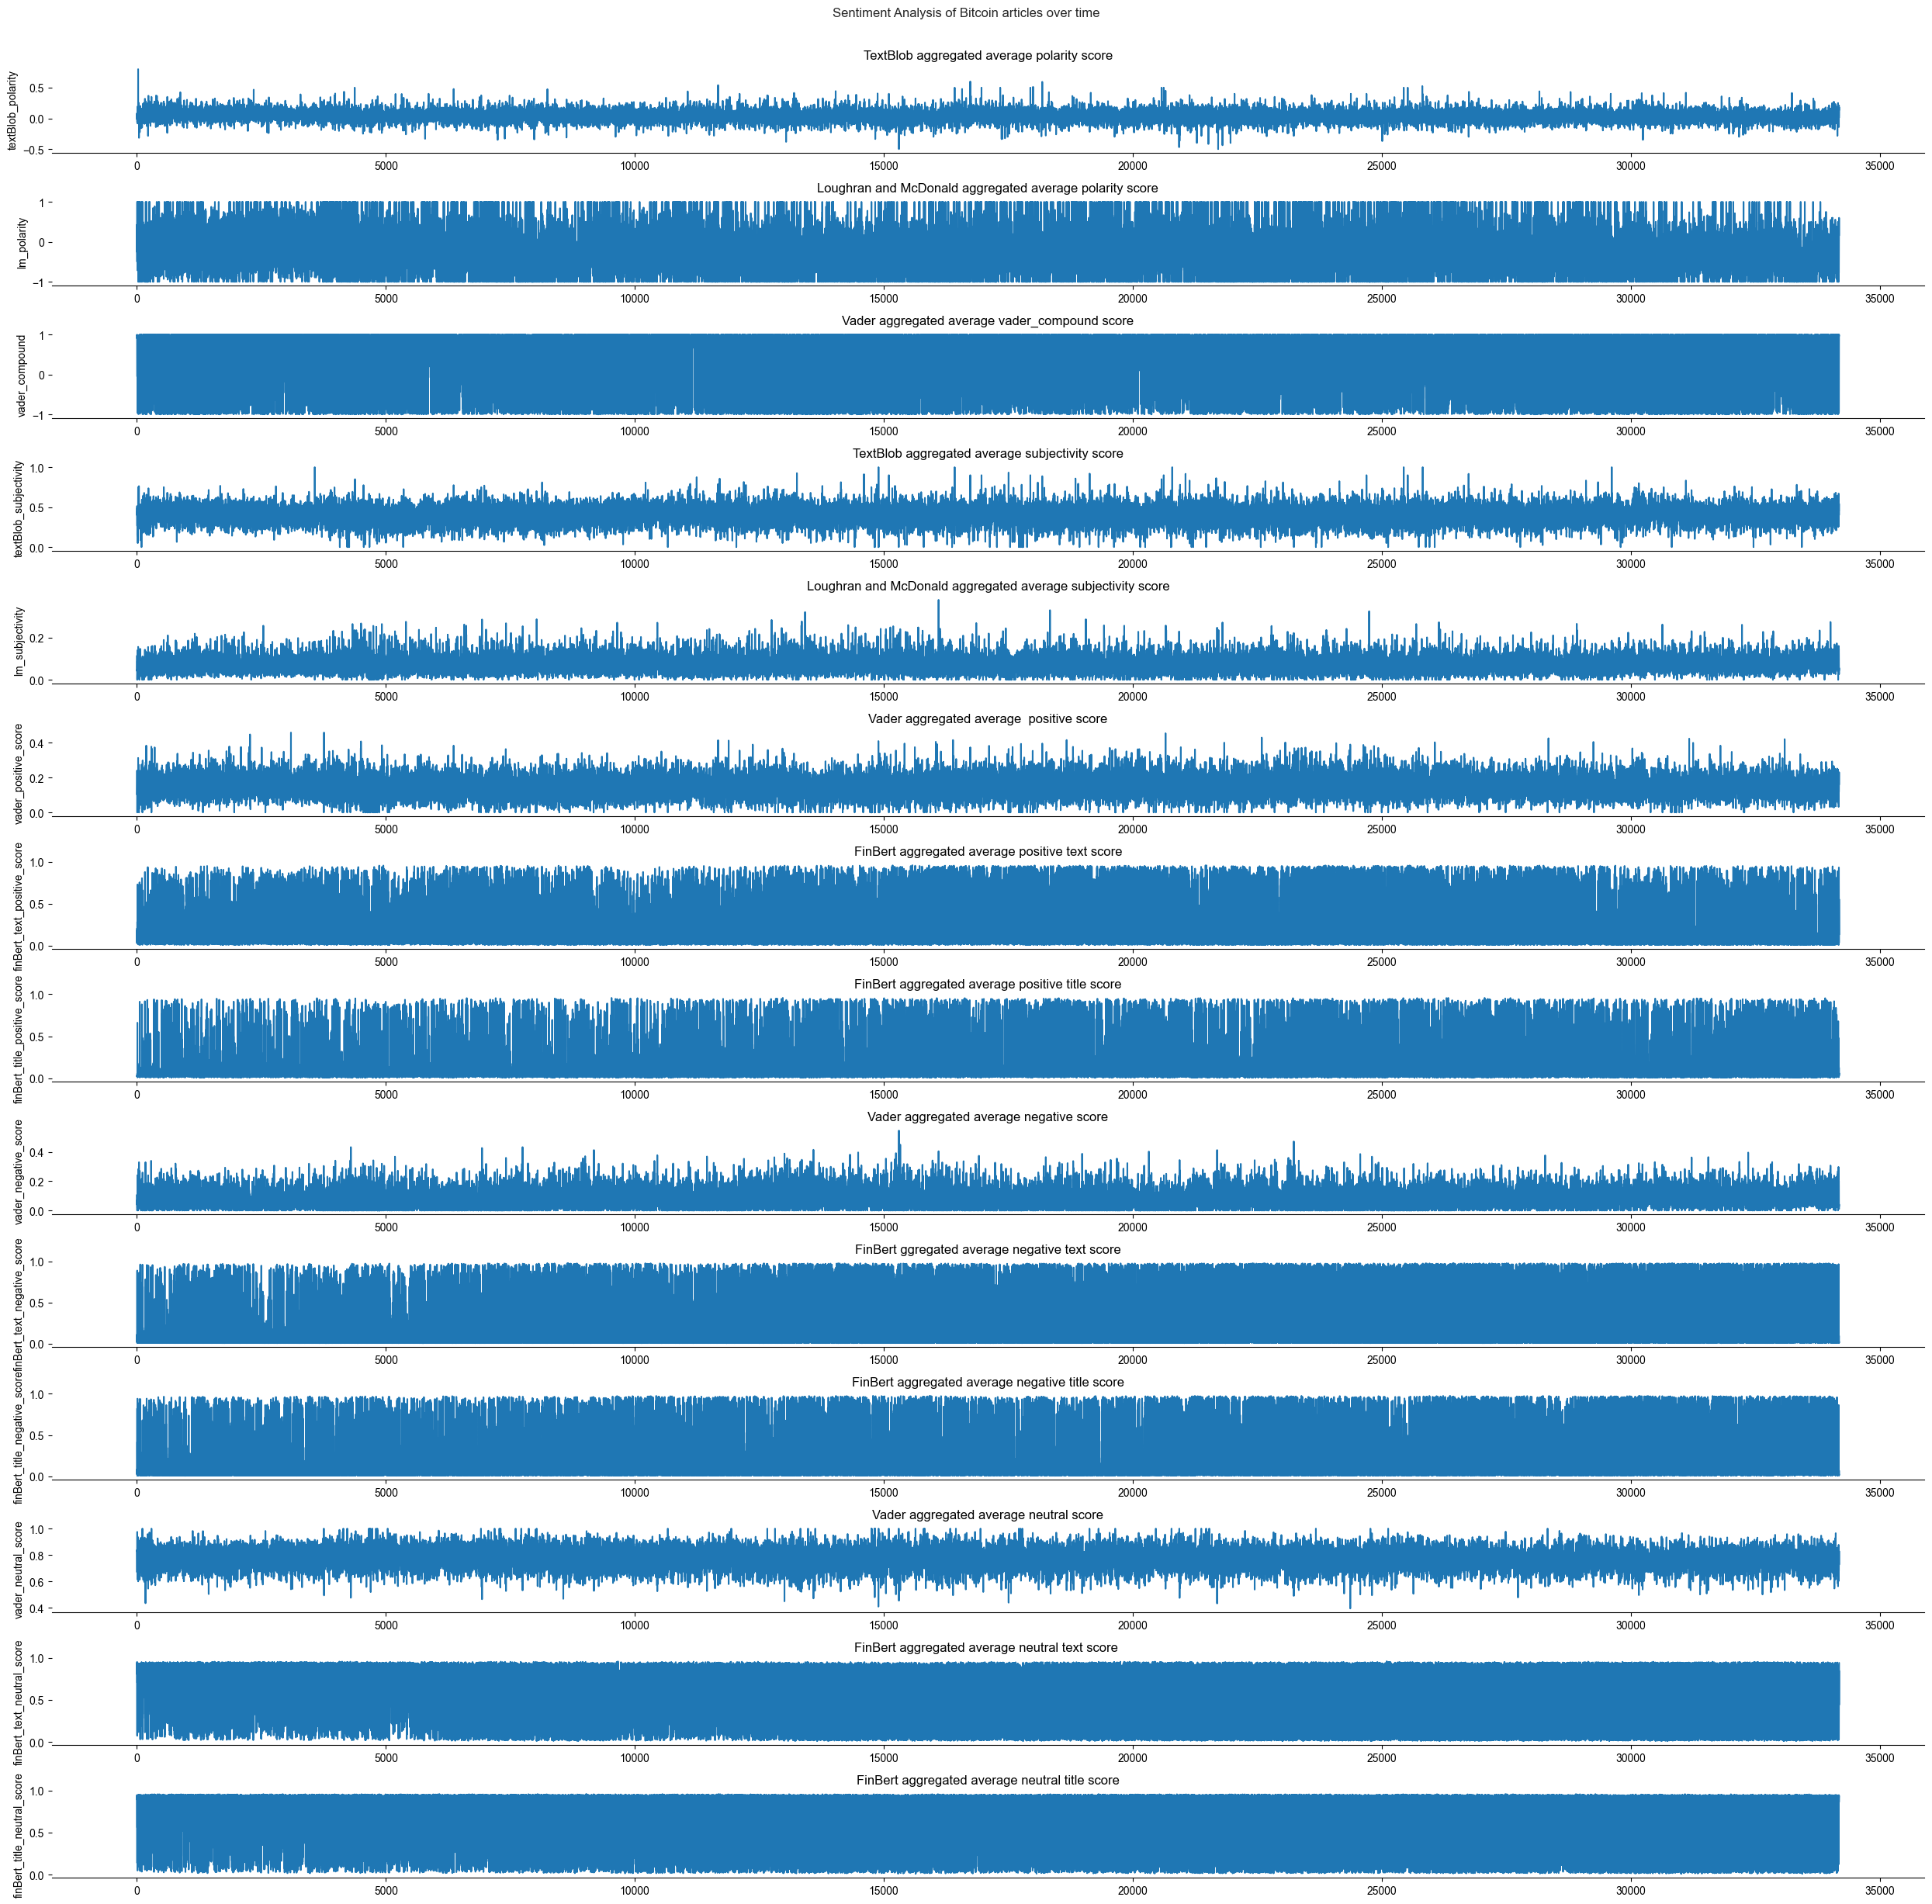

In [18]:
plot_all_sentiments_subplots(btc_abt, 'Bitcoin')

## Compare lexicon-based approaches

In [19]:
btc_abt[['textBlob_polarity', 'lm_polarity', 'vader_compound']].describe(include='all').T

count      mean       std     min       25%       50%  \
textBlob_polarity  34183.0  0.037354  0.081601 -0.5000 -0.010417  0.035296   
lm_polarity        34183.0 -0.263659  0.479986 -1.0000 -0.600000 -0.333333   
vader_compound     34183.0  0.515524  0.706365 -0.9996  0.273200  0.924600   

                       75%     max  
textBlob_polarity  0.08378  0.8000  
lm_polarity        0.00000  1.0000  
vader_compound     0.98310  0.9999

In [20]:
btc_abt[['finBert_text_sentiment', 'finBert_title_sentiment']].describe().T

count      mean       std  min  25%  50%  75%  max
finBert_title_sentiment  34183.0  1.606588  0.681968  0.0  1.0  2.0  2.0  2.0

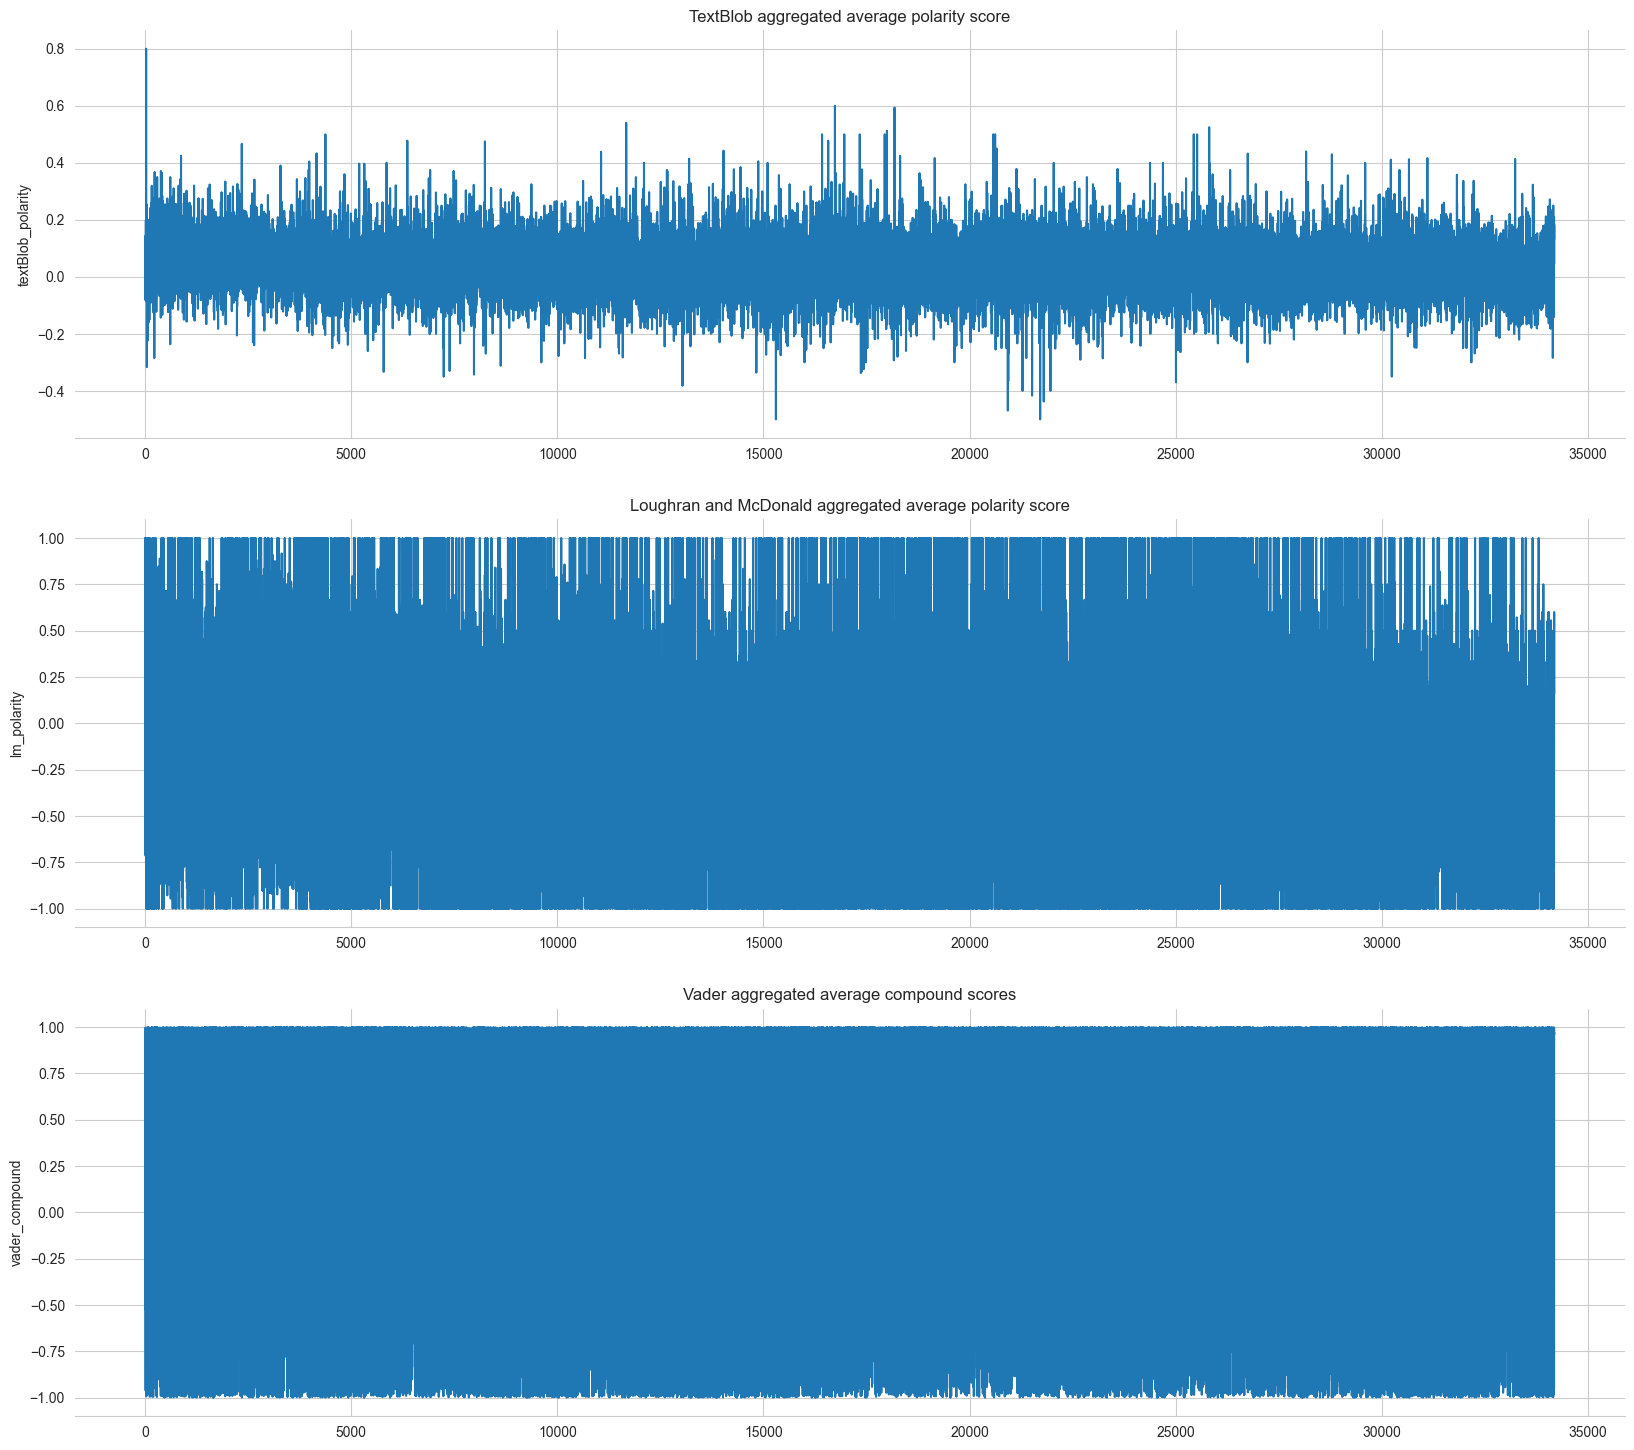

In [21]:
plot_sentiment_ts(data=btc_abt, y1='textBlob_polarity',title1='TextBlob aggregated average polarity score',
               y2='lm_polarity', title2='Loughran and McDonald aggregated average polarity score',   
               y3='vader_compound', title3='Vader aggregated average compound scores')          

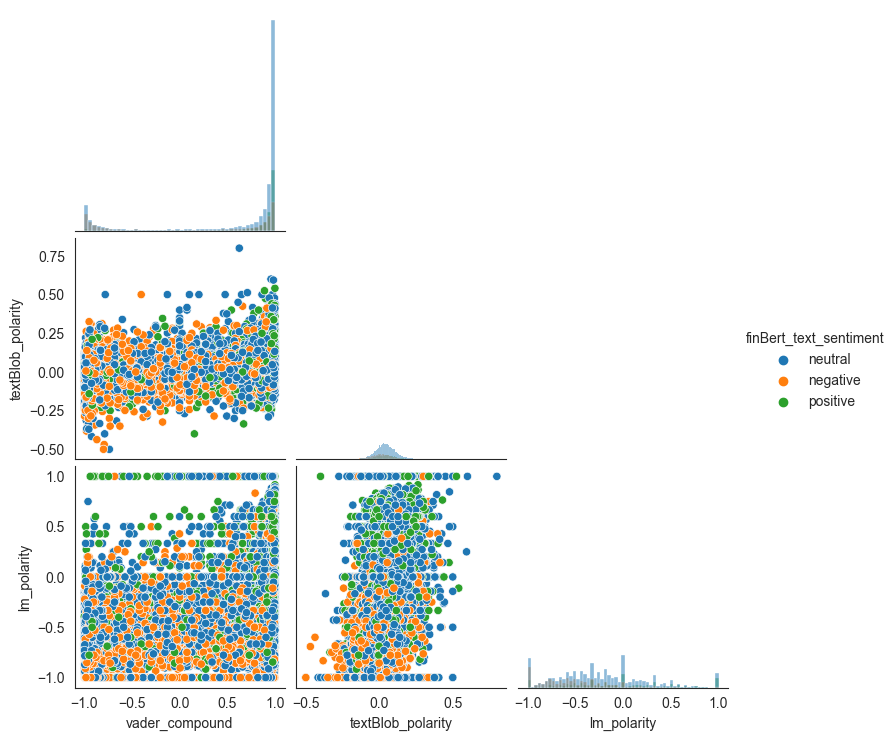

In [22]:
sns.set_style("white")
sns.pairplot(btc_abt, x_vars=['vader_compound','textBlob_polarity', 'lm_polarity'],
             y_vars= ['vader_compound','textBlob_polarity', 'lm_polarity'],
             diag_kind="hist", hue='finBert_text_sentiment', corner=True)
plt.show()

<Figure size 640x480 with 0 Axes>

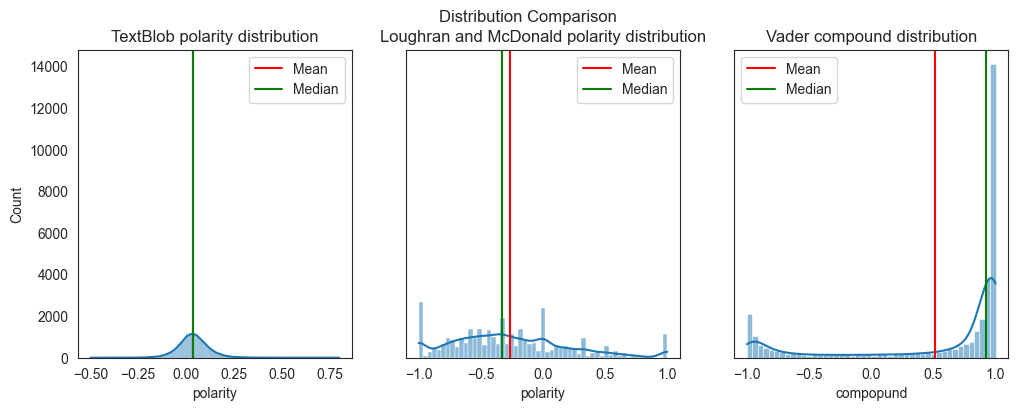

In [23]:
plot_distribution(data=btc_abt, x1='textBlob_polarity',x1_label='polarity',title1='TextBlob polarity distribution',
               x2='lm_polarity', x2_label='polarity', title2='Loughran and McDonald polarity distribution', 
               x3='vader_compound',x3_label='compopund',title3='Vader compound distribution')     

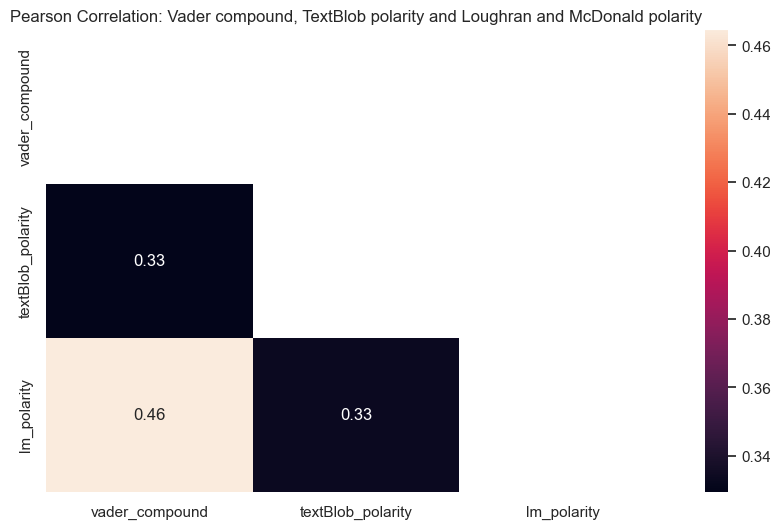

In [24]:
plt_corr_heatmap(btc_abt,['vader_compound','textBlob_polarity', 'lm_polarity'], title='Pearson Correlation: Vader compound, TextBlob polarity and Loughran and McDonald polarity')

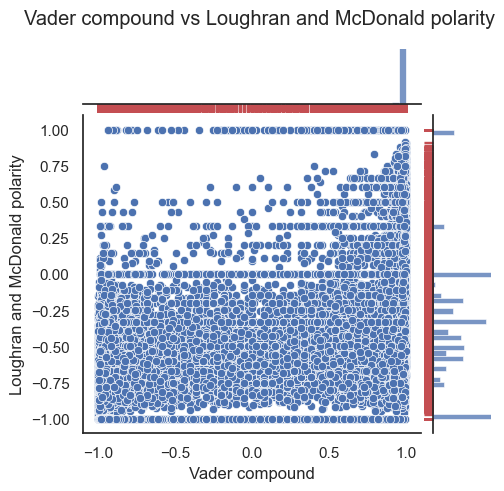

In [25]:
plot_jointplot(data=btc_abt,x='vader_compound', y='lm_polarity',title='Vader compound vs Loughran and McDonald polarity', x_label='Vader compound', y_label='Loughran and McDonald polarity')

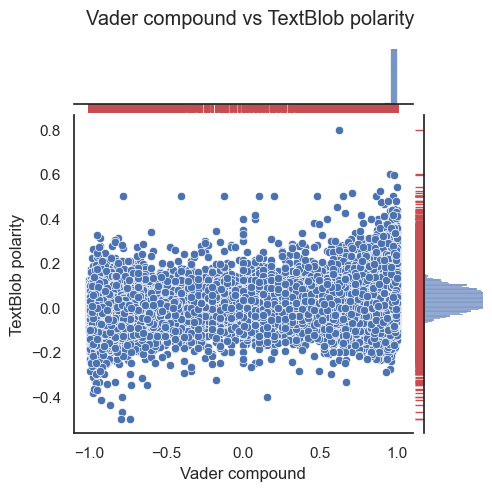

In [26]:
plot_jointplot(data=btc_abt, x='vader_compound', y='textBlob_polarity',title='Vader compound vs TextBlob polarity', x_label='Vader compound', y_label='TextBlob polarity')

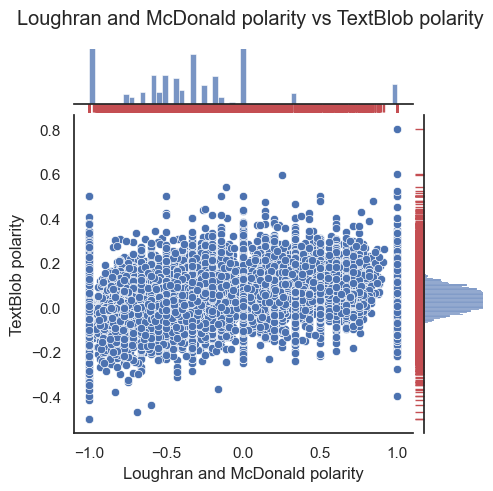

In [27]:
plot_jointplot(data=btc_abt, x='lm_polarity', y='textBlob_polarity',title='Loughran and McDonald polarity vs TextBlob polarity', x_label='Loughran and McDonald polarity', y_label='TextBlob polarity')

In [28]:
btc_abt_rolling = btc_abt
btc_abt_rolling.date = pd.to_datetime(btc_abt_rolling.date, infer_datetime_format=True)
btc_abt_rolling.set_index('date', inplace=True)

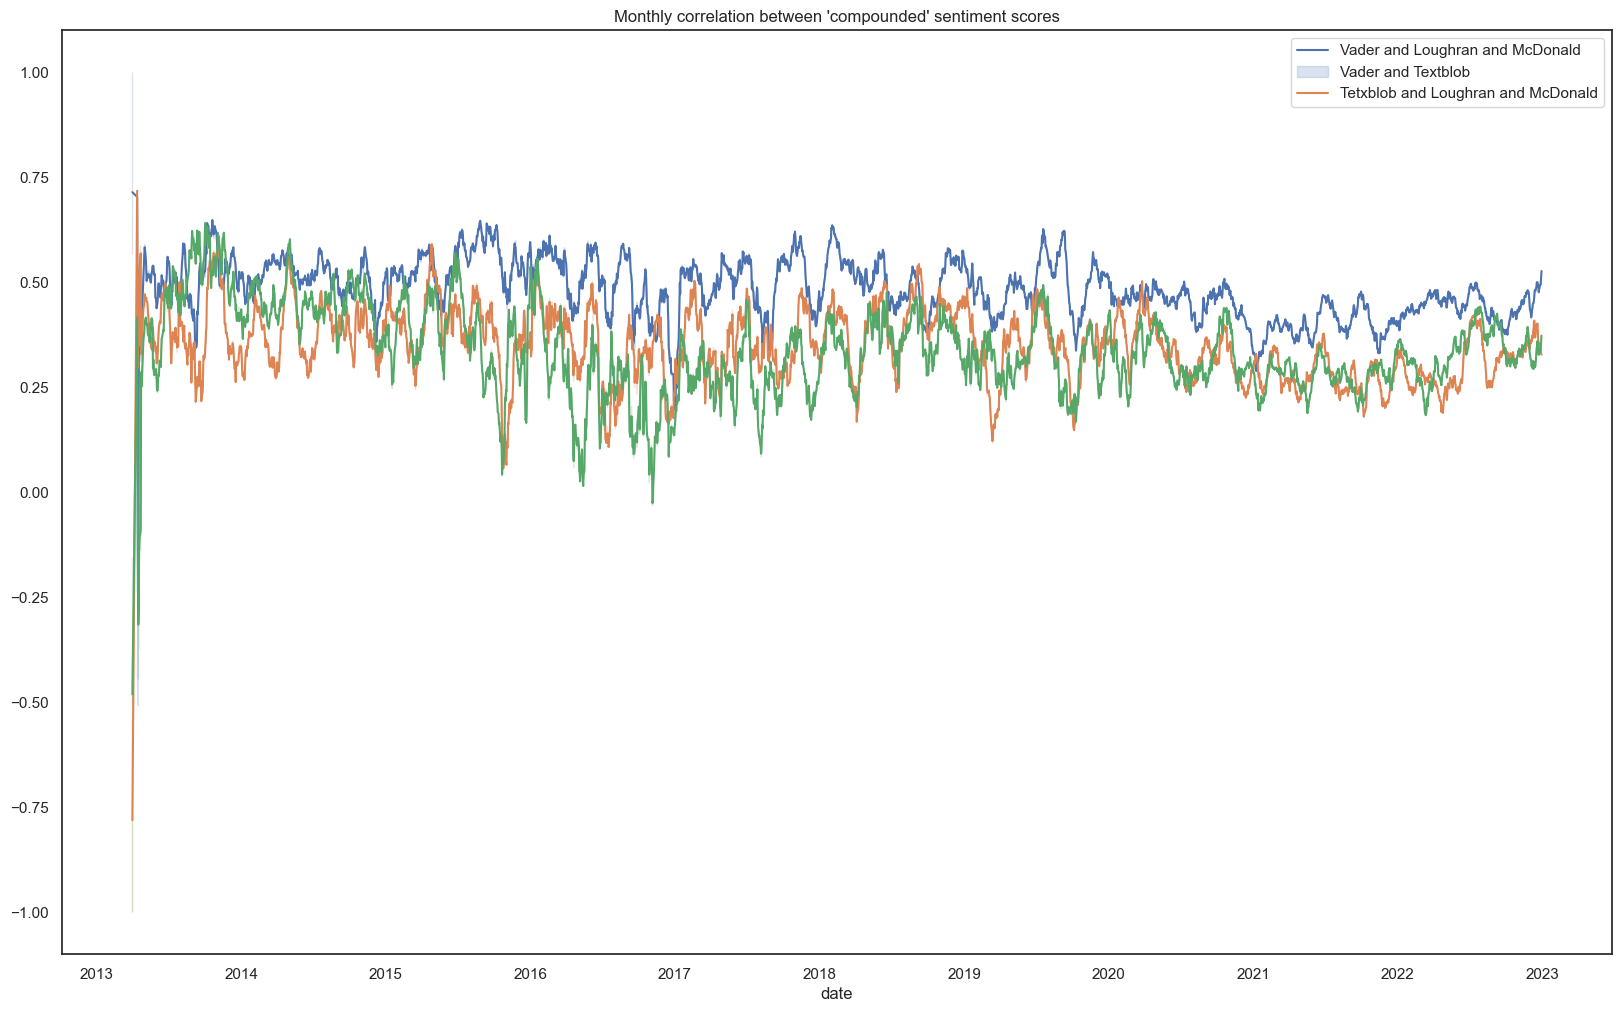

In [29]:
plt.figure(figsize=(20,12))
sns.lineplot(btc_abt_rolling.vader_compound.rolling('30D', min_periods=0).corr(btc_abt_rolling.lm_polarity))
sns.lineplot(btc_abt_rolling.vader_compound.rolling('30D', min_periods=0).corr(btc_abt_rolling.textBlob_polarity))
sns.lineplot(btc_abt_rolling.textBlob_polarity.rolling('30D', min_periods=0).corr(btc_abt_rolling.lm_polarity))
plt.legend(['Vader and Loughran and McDonald','Vader and Textblob','Tetxblob and Loughran and McDonald'])
plt.title("Monthly correlation between 'compounded' sentiment scores")
plt.show()

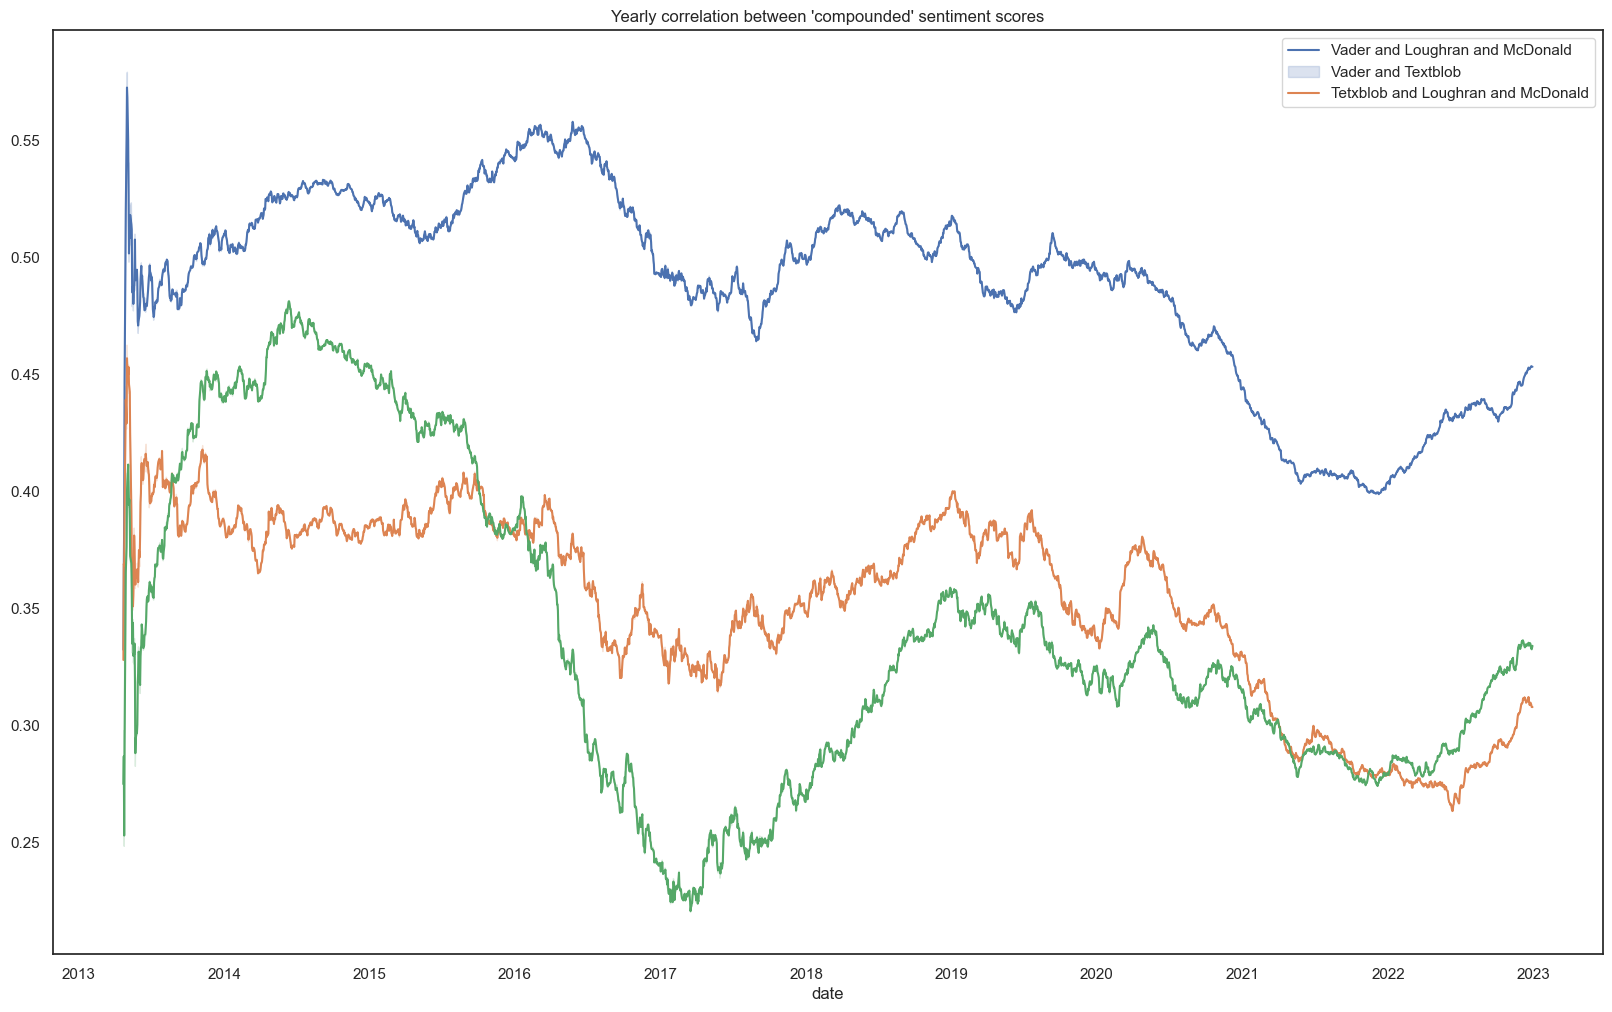

In [30]:
plt.figure(figsize=(20,12))
sns.lineplot(btc_abt_rolling.vader_compound.rolling('365D', min_periods=30).corr(btc_abt_rolling.lm_polarity))
sns.lineplot(btc_abt_rolling.vader_compound.rolling('365D', min_periods=30).corr(btc_abt_rolling.textBlob_polarity))
sns.lineplot(btc_abt_rolling.textBlob_polarity.rolling('365D', min_periods=30).corr(btc_abt_rolling.lm_polarity))
plt.legend(['Vader and Loughran and McDonald','Vader and Textblob','Tetxblob and Loughran and McDonald'])
plt.title("Yearly correlation between 'compounded' sentiment scores")
plt.show()

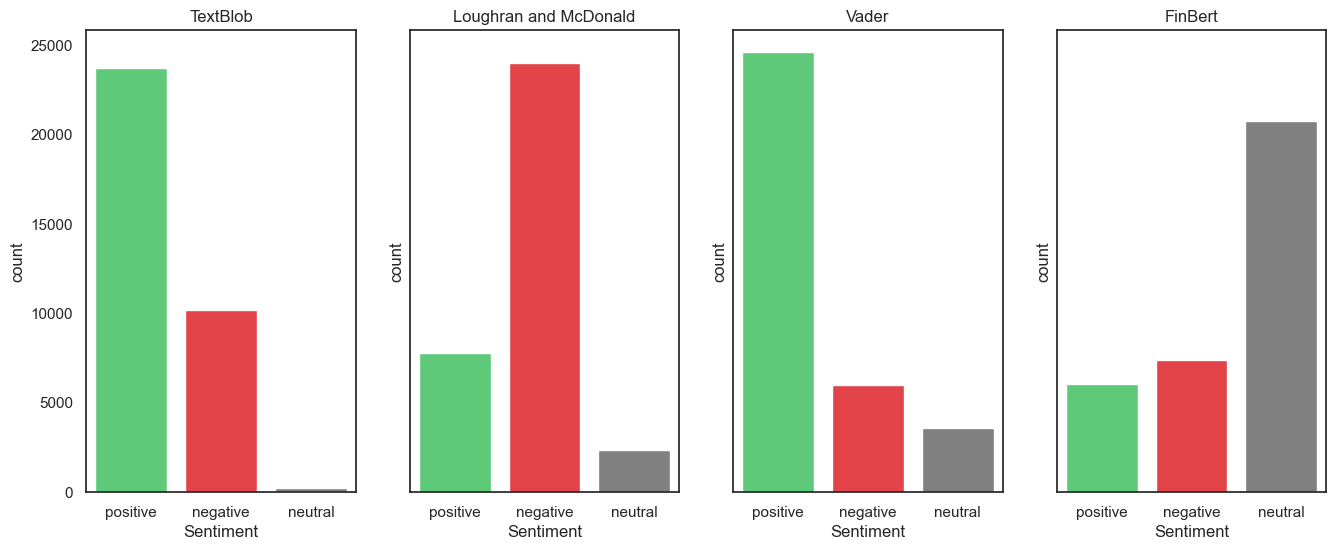

In [31]:
fig, axes = plt.subplots(1,4, figsize=(16,6), sharey=True)
order = ['positive', 'negative','neutral']
sns.countplot(data=btc_abt, x='textBlob_sentiment', order=order, ax=axes[0], palette=[ '#4eda71','#fb2930','#808080'])
axes[0].set_title('TextBlob')
axes[0].set_xlabel('Sentiment')
sns.countplot(data=btc_abt, x='lm_sentiment', order=order, ax=axes[1],palette=[ '#4eda71','#fb2930','#808080'])
axes[1].set_title('Loughran and McDonald')
axes[1].set_xlabel('Sentiment')
sns.countplot(data=btc_abt, x='vader_sentiment', order=order, ax=axes[2],palette=[ '#4eda71','#fb2930','#808080'])
axes[2].set_title('Vader')
axes[2].set_xlabel('Sentiment')
sns.countplot(data=btc_abt, x='finBert_text_sentiment', order=order, ax=axes[3],palette=[ '#4eda71','#fb2930','#808080'])
axes[3].set_title('FinBert')
axes[3].set_xlabel('Sentiment')
plt.show()

##  Compare positive sentiment scores

In [33]:
pos_data = create_sentiment_df('positive', btc_abt.reset_index())
pos_data.describe().T

count      mean       std           min       25%       50%  \
vader     34183.0  0.147960  0.056748  0.000000e+00  0.110000  0.145000   
finbert   34183.0  0.215384  0.269768  6.000000e-03  0.034000  0.083000   
textblob  23743.0  0.076005  0.060363  9.912706e-19  0.032012  0.062619   
lm         7774.0  0.424018  0.303496  9.900990e-03  0.181818  0.333333   

               75%    max  
vader     0.182000  0.459  
finbert   0.268000  0.958  
textblob  0.104125  0.800  
lm        0.600000  1.000

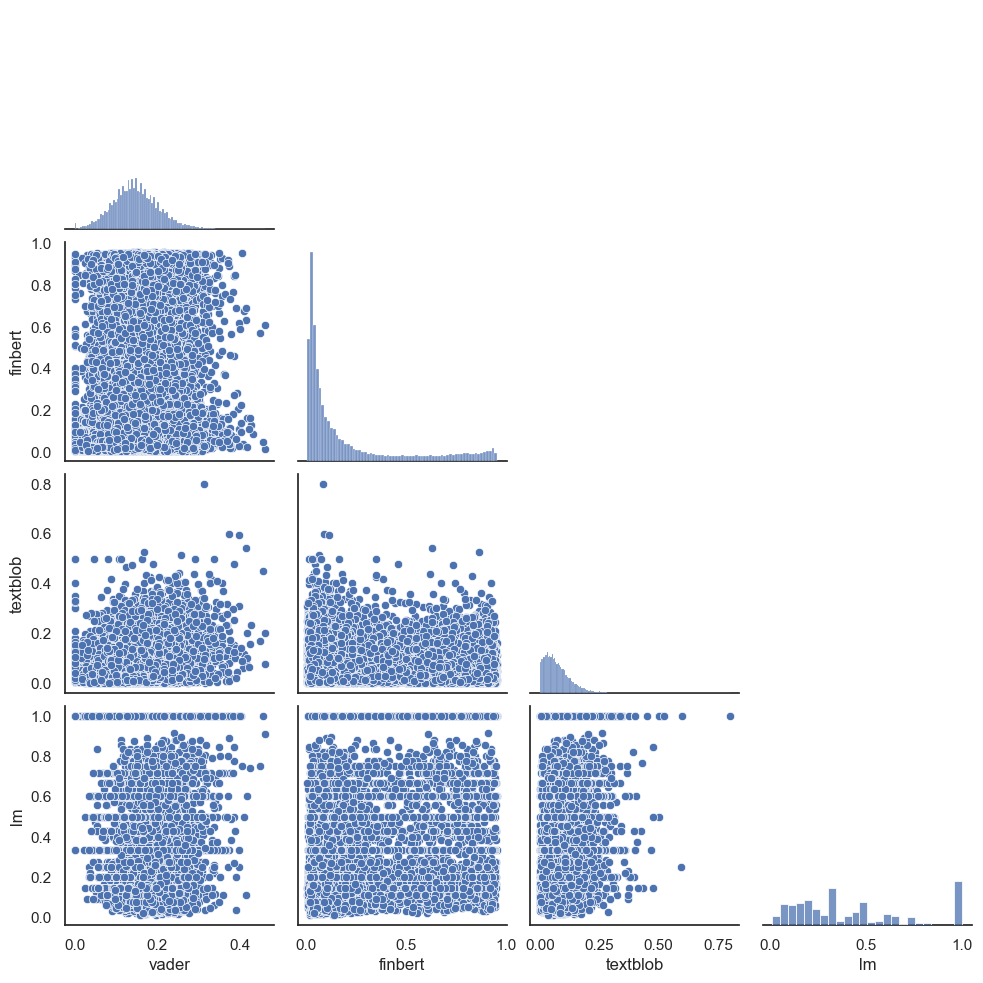

In [34]:
sns.set_style("white")
sns.pairplot(pos_data[['vader','finbert', 'textblob','lm']], corner=True)
plt.show()

<Figure size 640x480 with 0 Axes>

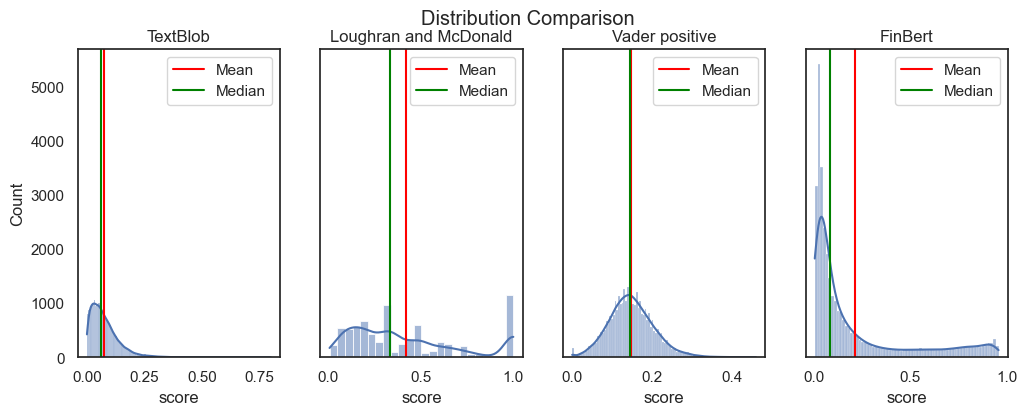

In [35]:
plot_distribution(data=pos_data, x1='textblob',x1_label='score',title1='TextBlob',
               x2='lm', x2_label='score', title2='Loughran and McDonald', 
               x3='vader',x3_label='score',title3='Vader positive', 
                  x4='finbert', x4_label='score', title4='FinBert',
                  flag='positive')     
plt.show()

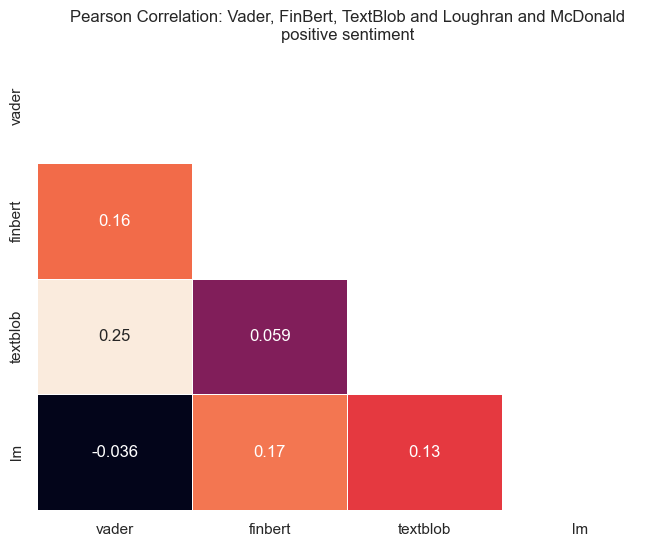

In [36]:
plt.figure(figsize=(8,6))
sns.set_theme(style="white")
p_mask = np.triu(np.ones_like(pos_data.iloc[:,1:].corr(), dtype=bool))
sns.heatmap(pos_data.iloc[:,1:].corr(),annot=True, mask=p_mask, linewidth=.5,cbar=False)
plt.title('Pearson Correlation: Vader, FinBert, TextBlob and Loughran and McDonald\npositive sentiment')
plt.show()

In [37]:
pos_roll_corr = pos_data.set_index('date')

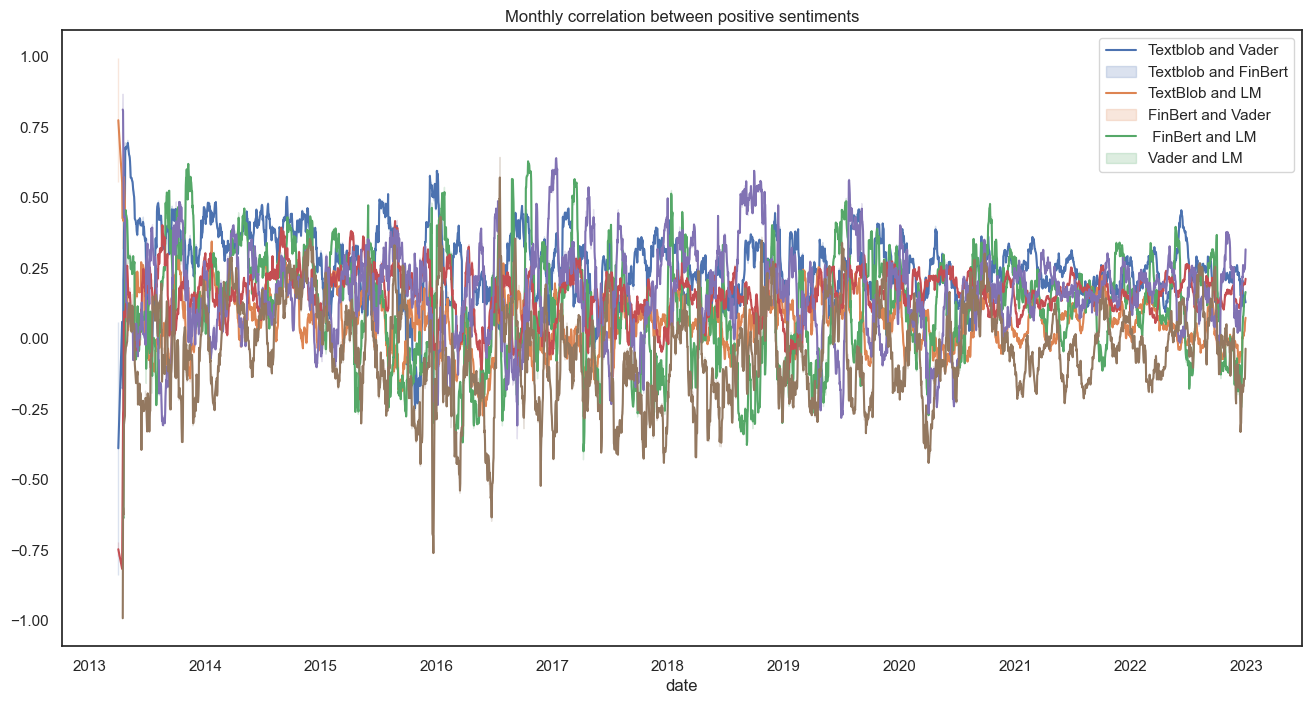

In [38]:
plt.figure(figsize=(16,8))
sns.lineplot(pos_roll_corr.textblob.rolling('30D', min_periods=3).corr(pos_roll_corr.vader))
sns.lineplot(pos_roll_corr.textblob.rolling('30D', min_periods=3).corr(pos_roll_corr.finbert))
sns.lineplot(pos_roll_corr.textblob.rolling('30D', min_periods=3).corr(pos_roll_corr.lm))
sns.lineplot(pos_roll_corr.finbert.rolling('30D', min_periods=3).corr(pos_roll_corr.vader))
sns.lineplot(pos_roll_corr.finbert.rolling('30D', min_periods=3).corr(pos_roll_corr.lm))
sns.lineplot(pos_roll_corr.vader.rolling('30D', min_periods=3).corr(pos_roll_corr.lm))
plt.legend(['Textblob and Vader', 'Textblob and FinBert', 'TextBlob and LM', 
            'FinBert and Vader',' FinBert and LM', 'Vader and LM'])
plt.title('Monthly correlation between positive sentiments')
plt.show()

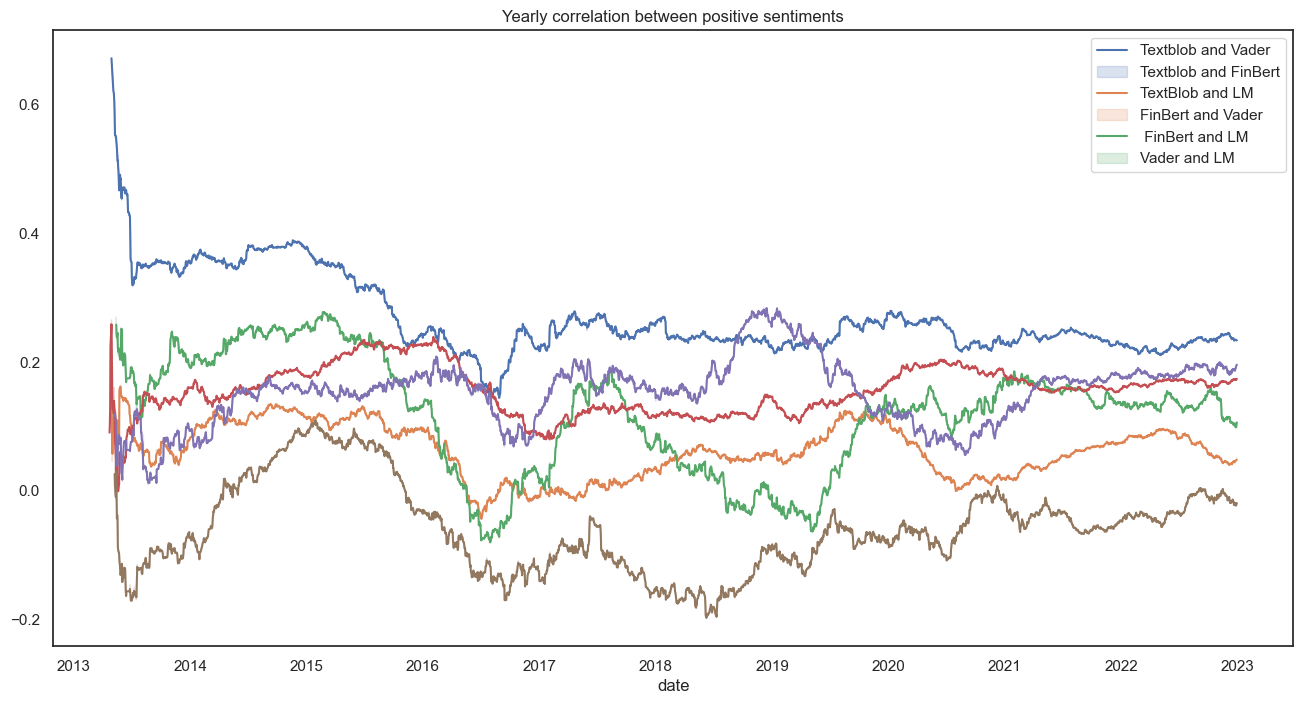

In [39]:
plt.figure(figsize=(16,8))
sns.lineplot(pos_roll_corr.textblob.rolling('365D', min_periods=30).corr(pos_roll_corr.vader))
sns.lineplot(pos_roll_corr.textblob.rolling('365D', min_periods=30).corr(pos_roll_corr.finbert))
sns.lineplot(pos_roll_corr.textblob.rolling('365D', min_periods=30).corr(pos_roll_corr.lm))
sns.lineplot(pos_roll_corr.finbert.rolling('365D', min_periods=30).corr(pos_roll_corr.vader))
sns.lineplot(pos_roll_corr.finbert.rolling('365D', min_periods=30).corr(pos_roll_corr.lm))
sns.lineplot(pos_roll_corr.vader.rolling('365D', min_periods=30).corr(pos_roll_corr.lm))
plt.legend(['Textblob and Vader', 'Textblob and FinBert', 'TextBlob and LM', 
            'FinBert and Vader',' FinBert and LM', 'Vader and LM'])
plt.title('Yearly correlation between positive sentiments')
plt.show()

##  Compare negative sentiment

In [40]:
neg_data = create_sentiment_df('negative', btc_abt.reset_index())
neg_data.describe().T

count      mean       std    min       25%       50%       75%  \
vader     34183.0  0.080810  0.060477  0.000  0.035000  0.071000  0.114000   
finbert   34183.0  0.225265  0.323866  0.006  0.014000  0.038000  0.327000   
textblob  10177.0 -0.051855  0.048839 -0.500 -0.071875 -0.038194 -0.016814   
lm        24025.0 -0.512340  0.276095 -1.000 -0.714286 -0.500000 -0.294118   

                   max  
vader     5.450000e-01  
finbert   9.760000e-01  
textblob -1.206764e-18  
lm       -9.009009e-03

In [41]:
neg_data.describe().T

count      mean       std    min       25%       50%       75%  \
vader     34183.0  0.080810  0.060477  0.000  0.035000  0.071000  0.114000   
finbert   34183.0  0.225265  0.323866  0.006  0.014000  0.038000  0.327000   
textblob  10177.0 -0.051855  0.048839 -0.500 -0.071875 -0.038194 -0.016814   
lm        24025.0 -0.512340  0.276095 -1.000 -0.714286 -0.500000 -0.294118   

                   max  
vader     5.450000e-01  
finbert   9.760000e-01  
textblob -1.206764e-18  
lm       -9.009009e-03

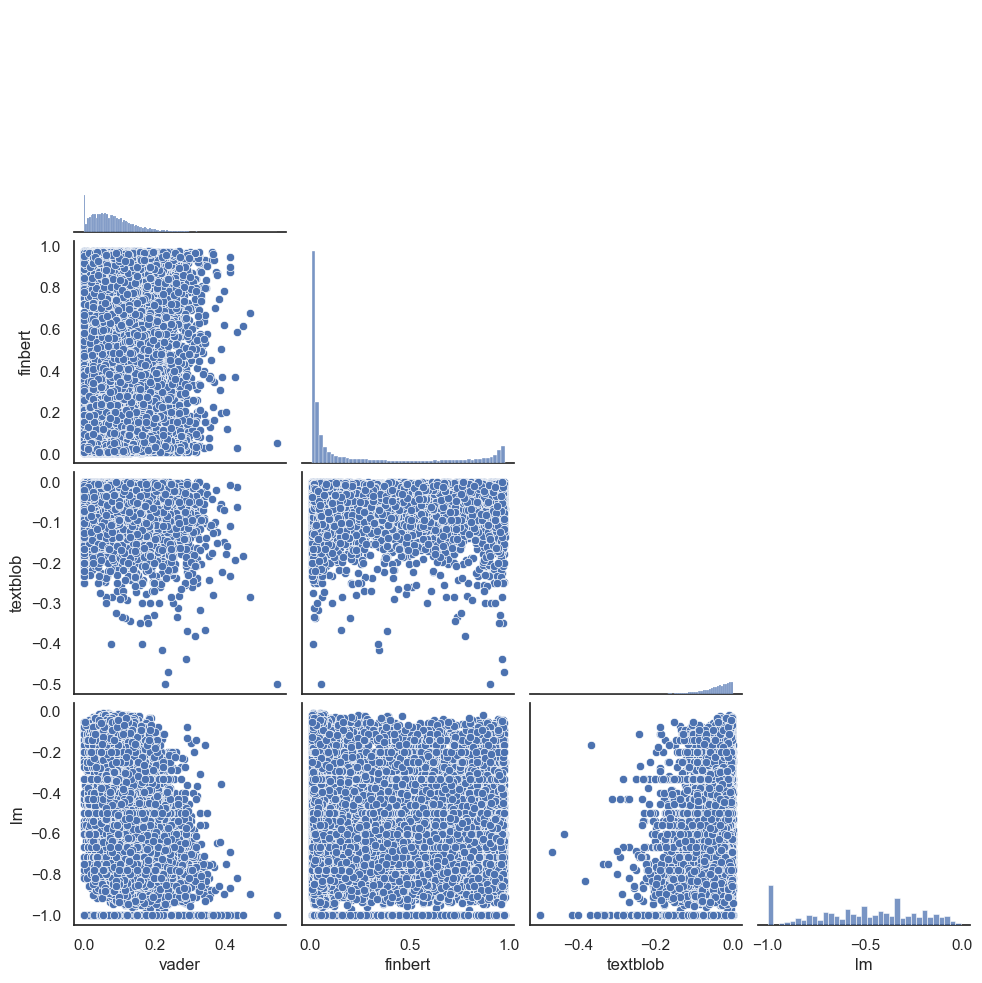

In [42]:
sns.set_style("white")
sns.pairplot(neg_data[['vader','finbert', 'textblob','lm']], corner=True)
plt.show()

<Figure size 640x480 with 0 Axes>

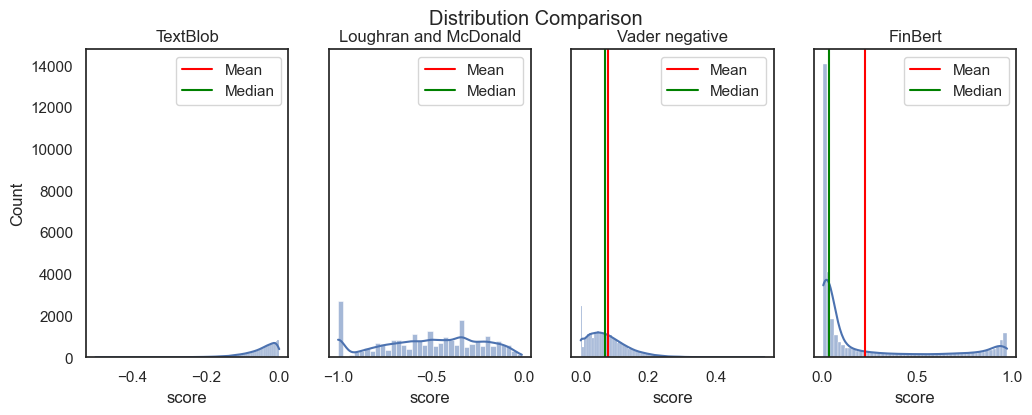

In [43]:
plot_distribution(data=neg_data, x1='textblob',x1_label='score',title1='TextBlob',
               x2='lm', x2_label='score', title2='Loughran and McDonald', 
               x3='vader',x3_label='score',title3='Vader negative', 
                  x4='finbert', x4_label='score', title4='FinBert',
                  flag='negative')     
plt.show()

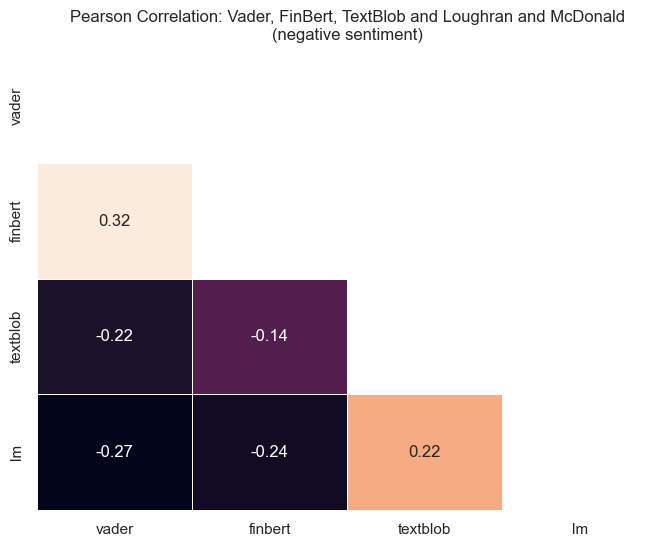

In [50]:
plt.figure(figsize=(8,6))
sns.set_theme(style="white")
n_mask = np.triu(np.ones_like(neg_data.iloc[:,1:].corr(),dtype=bool))
sns.heatmap(neg_data.iloc[:,1:].corr(),annot=True, mask=n_mask, linewidth=.5,cbar=False)
plt.title('Pearson Correlation: Vader, FinBert, TextBlob and Loughran and McDonald\n(negative sentiment)')
plt.show()

In [45]:
neg_roll_corr = neg_data.set_index('date')

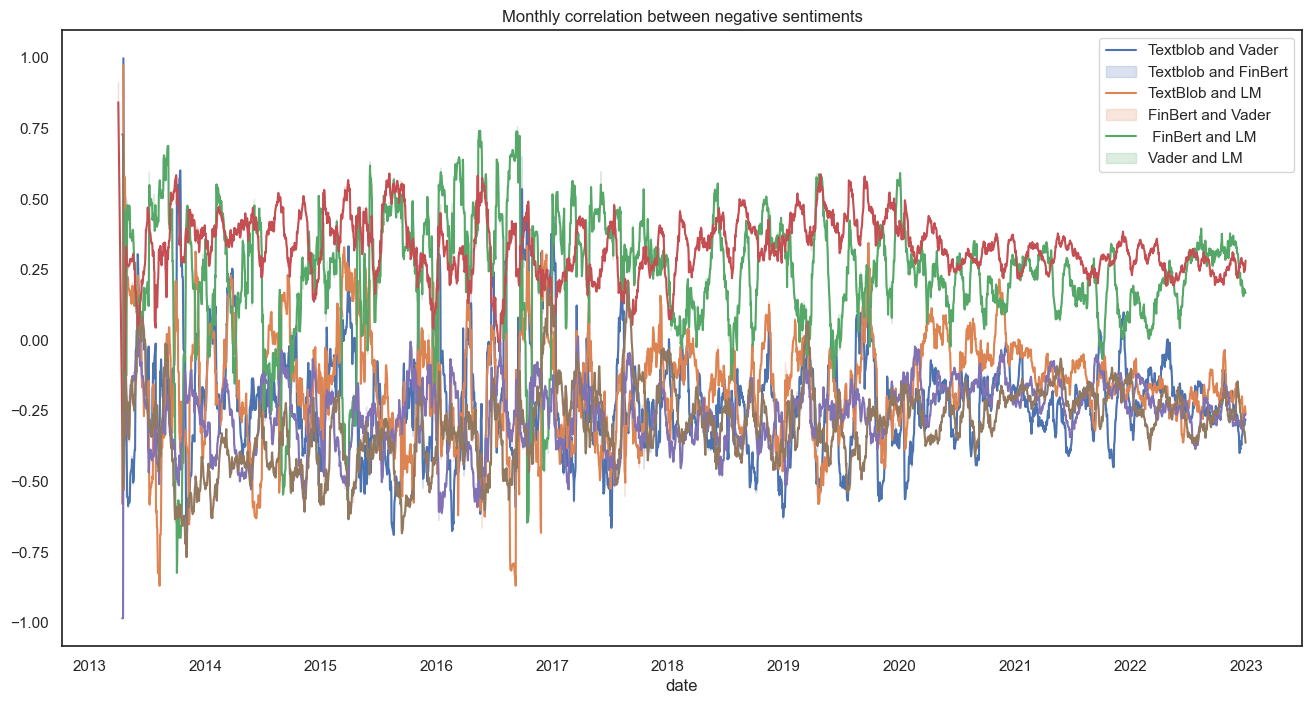

In [46]:
plt.figure(figsize=(16,8))
sns.lineplot(neg_roll_corr.textblob.rolling('30D', min_periods=3).corr(neg_roll_corr.vader))
sns.lineplot(neg_roll_corr.textblob.rolling('30D', min_periods=3).corr(neg_roll_corr.finbert))
sns.lineplot(neg_roll_corr.textblob.rolling('30D', min_periods=3).corr(neg_roll_corr.lm))
sns.lineplot(neg_roll_corr.finbert.rolling('30D', min_periods=3).corr(neg_roll_corr.vader))
sns.lineplot(neg_roll_corr.finbert.rolling('30D', min_periods=3).corr(neg_roll_corr.lm))
sns.lineplot(neg_roll_corr.vader.rolling('30D', min_periods=3).corr(neg_roll_corr.lm))
plt.legend(['Textblob and Vader', 'Textblob and FinBert', 'TextBlob and LM', 
            'FinBert and Vader',' FinBert and LM', 'Vader and LM'])
plt.title('Monthly correlation between negative sentiments')
plt.show()

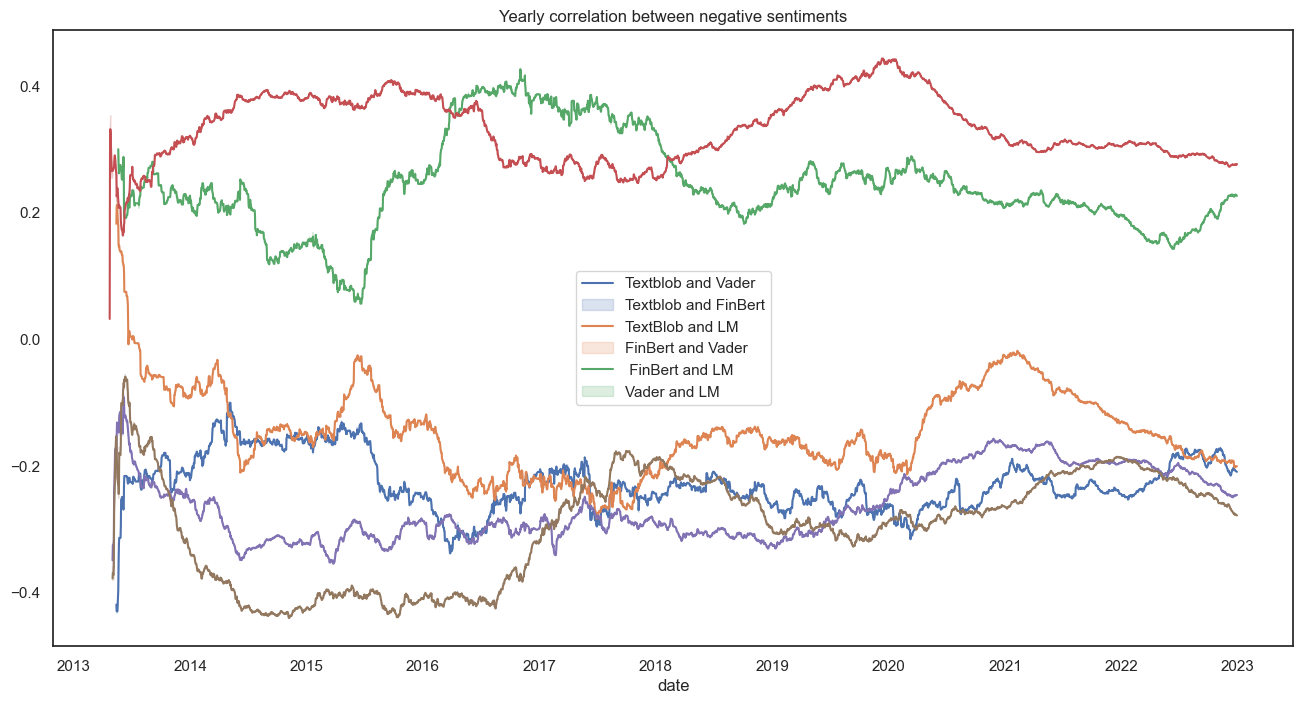

In [47]:
plt.figure(figsize=(16,8))
sns.lineplot(neg_roll_corr.textblob.rolling('365D', min_periods=30).corr(neg_roll_corr.vader))
sns.lineplot(neg_roll_corr.textblob.rolling('365D', min_periods=30).corr(neg_roll_corr.finbert))
sns.lineplot(neg_roll_corr.textblob.rolling('365D', min_periods=30).corr(neg_roll_corr.lm))
sns.lineplot(neg_roll_corr.finbert.rolling('365D', min_periods=30).corr(neg_roll_corr.vader))
sns.lineplot(neg_roll_corr.finbert.rolling('365D', min_periods=30).corr(neg_roll_corr.lm))
sns.lineplot(neg_roll_corr.vader.rolling('365D', min_periods=30).corr(neg_roll_corr.lm))
plt.legend(['Textblob and Vader', 'Textblob and FinBert', 'TextBlob and LM', 
            'FinBert and Vader',' FinBert and LM', 'Vader and LM'])
plt.title('Yearly correlation between negative sentiments')
plt.show()

### Heatmap positive and negative sentiment correlation

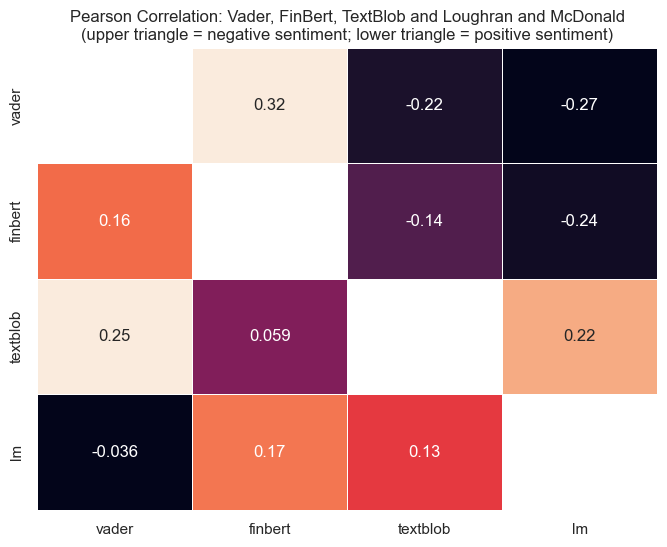

In [48]:
plt.figure(figsize=(8,6))
sns.set_theme(style="white")
n_mask = np.tril(np.ones_like(neg_data.iloc[:,1:].corr(),dtype=bool))
sns.heatmap(neg_data.iloc[:,1:].corr(),annot=True, mask=n_mask, linewidth=.5,cbar=False)
sns.heatmap(pos_data.iloc[:,1:].corr(),annot=True, mask=p_mask, linewidth=.5,cbar=False)
p_mask = np.triu(np.ones_like(pos_data.iloc[:,1:].corr(), dtype=bool))
plt.title('Pearson Correlation: Vader, FinBert, TextBlob and Loughran and McDonald\n(upper triangle = negative sentiment; lower triangle = positive sentiment)')
plt.show()

##  Compare neutral sentiment

In [51]:
neu_data = create_sentiment_df('neutral', btc_abt.reset_index())

In [52]:
neu_data.describe().T

count      mean       std    min    25%    50%    75%    max
vader     34183.0  0.771232  0.070574  0.396  0.727  0.772  0.817  1.000
finbert   34183.0  0.559351  0.343444  0.009  0.191  0.694  0.882  0.958
textblob    263.0  0.000000  0.000000  0.000  0.000  0.000  0.000  0.000
lm         2384.0  0.000000  0.000000  0.000  0.000  0.000  0.000  0.000

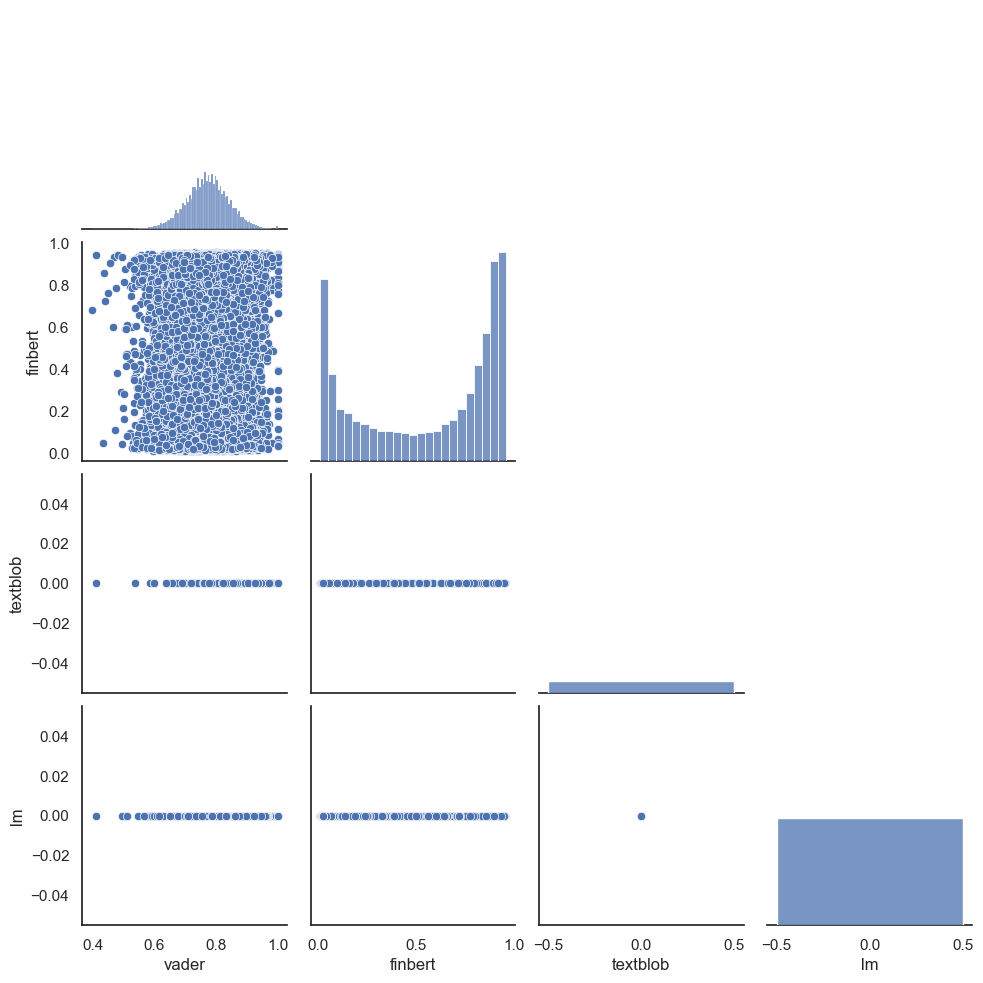

In [53]:
sns.set_style("white")
sns.pairplot(neu_data[['vader','finbert', 'textblob','lm']], corner=True)
plt.show()

<Figure size 640x480 with 0 Axes>

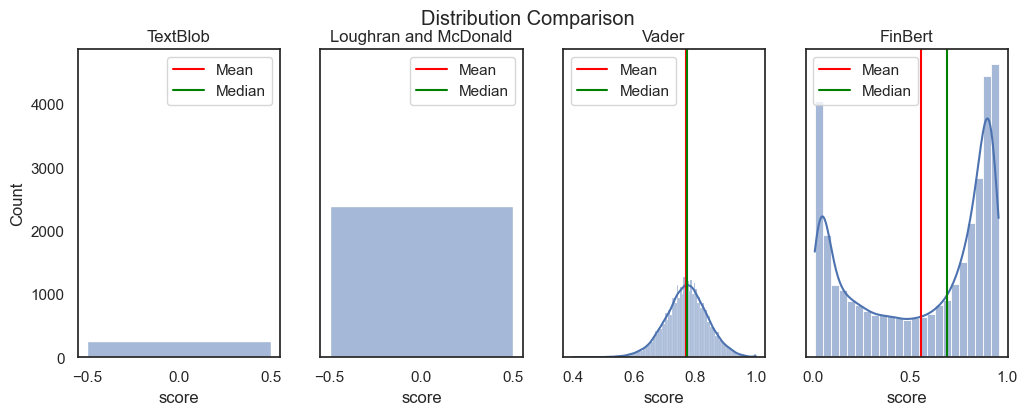

In [54]:
plot_distribution(data=neu_data, x1='textblob',x1_label='score',title1='TextBlob',
               x2='lm', x2_label='score', title2='Loughran and McDonald', 
               x3='vader',x3_label='score',title3='Vader', 
                  x4='finbert', x4_label='score', title4='FinBert',
                  flag='neutral')     
plt.show()

TextBlob and Loughran and McDonal neutral sentiments are 0. Hence we will drop these from the df

In [55]:
neu_data.drop(['textblob','lm'],axis=1, inplace=True)

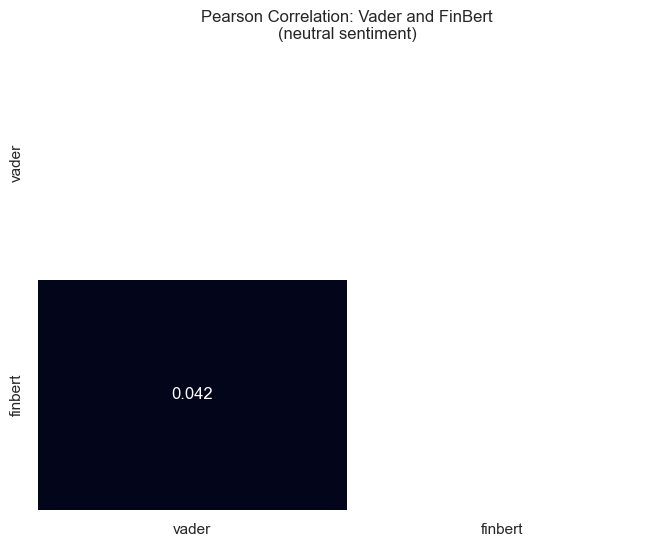

In [56]:
plt.figure(figsize=(8,6))
sns.set_theme(style="white")
p_mask = np.triu(np.ones_like(neu_data.corr(numeric_only=True), dtype=bool))
sns.heatmap(neu_data.corr(numeric_only=True),annot=True, mask=p_mask, linewidth=.5,cbar=False)
plt.title('Pearson Correlation: Vader and FinBert\n(neutral sentiment)')
plt.show()

In [57]:
neu_roll_corr = neu_data.set_index('date')

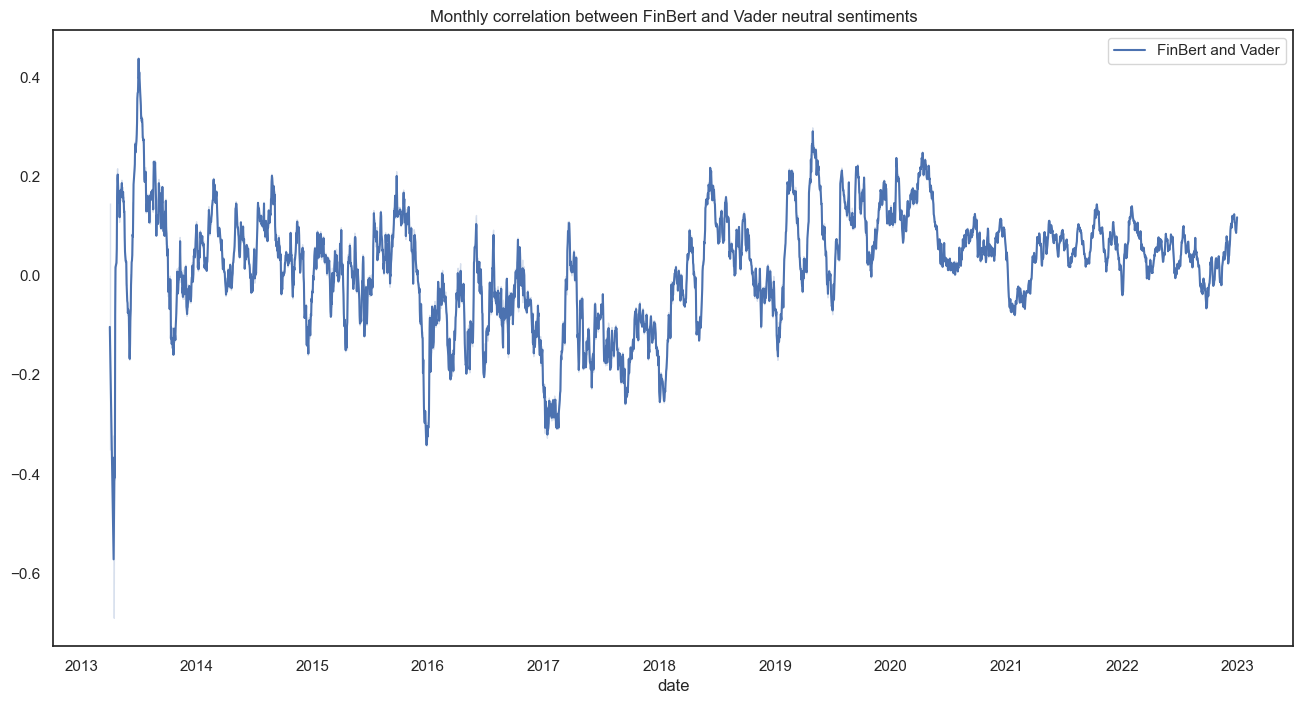

In [58]:
plt.figure(figsize=(16,8))
sns.lineplot(neu_roll_corr.finbert.rolling('30D', min_periods=3).corr(neu_roll_corr.vader))
plt.legend(['FinBert and Vader'])
plt.title('Monthly correlation between FinBert and Vader neutral sentiments')
plt.show()

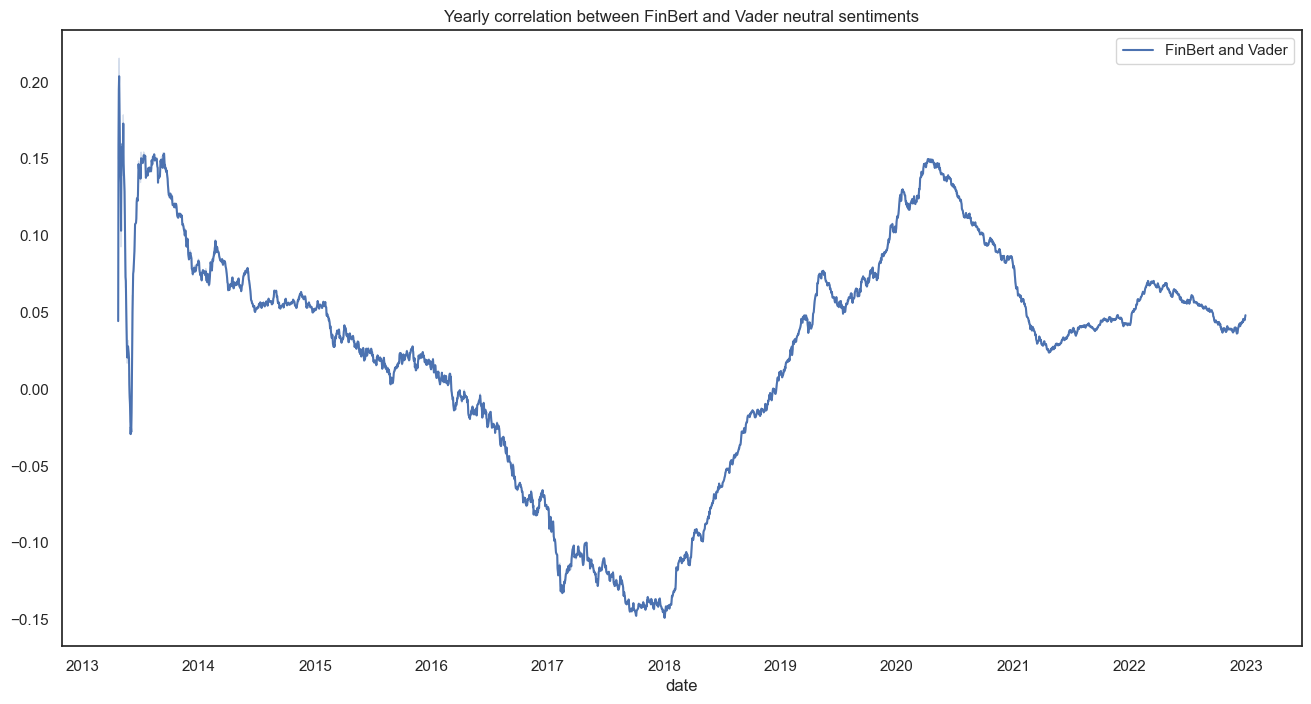

In [59]:
plt.figure(figsize=(16,8))
sns.lineplot(neu_roll_corr.finbert.rolling('365D', min_periods=30).corr(neu_roll_corr.vader))
plt.legend(['FinBert and Vader'])
plt.title('Yearly correlation between FinBert and Vader neutral sentiments')
plt.show()

## Result

- Without labeled data it's quite difficult to compare thr results
- FinBert analyze most of the article as neutral -> Further investigation: Check random articles
- Vader and Textblob positive and negative scores are generally similar to each other, with a small difference between them. The difference in neutral score seems to be due to the difference in thresholds (get_textBlob_sentiment, get_vader_sentiment)
- As the vader_compound scores increase, the polarity scores tend to increase (~0.38) as well, but the relationship is not perfect.